## Iris Dataset

### Outlier detector: **IsolationForest(n_estimators=30, random_state=10101)**

In [1]:
import sys 
sys.path.append('..')

In [2]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

2021-12-16 19:24:10.122017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 19:24:10.122038: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### set outlier detector parameters 

In [3]:
set_x_generation_paramters(max_samples=0.5, max_features=1.0, random_state=5)

In [4]:
data, outliers_index, inliers_index = read_dataset('iris')
dataset_name = 'iris'
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('../weights/outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("../weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("../weights/outlier_weight_{}.npy".format(dataset_name))
n_cluster = 8
C = self_tuning_spectral_clustering_np(S)   
print('number of cluster: ', len(C))

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 653.06it/s]

n_cluster: 2 	 cost: 444.595832
number of cluster:  2


In [5]:
W_1 = cvx_solver(C, X, X.shape[1], 1)
W_3 = cvx_solver(C, X, X.shape[1], 3)
W_5 = cvx_solver(C, X, X.shape[1], 5)
W_10 = cvx_solver(C, X, X.shape[1], 10)

### 分別實驗 lambda=1、3、5、10

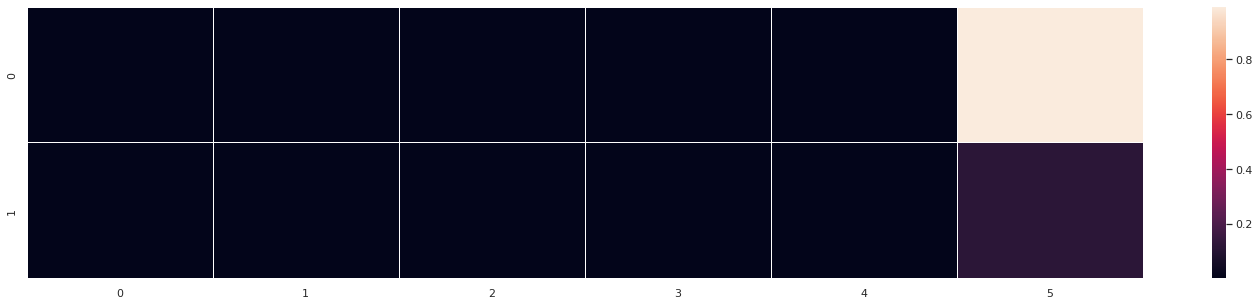

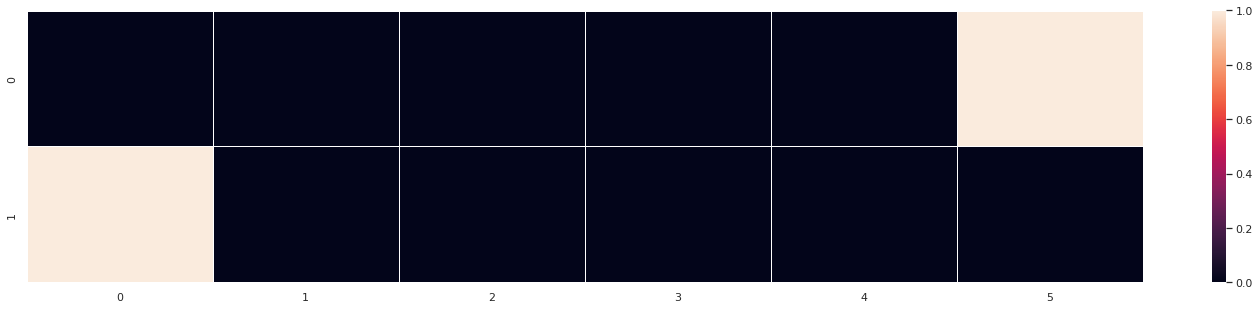

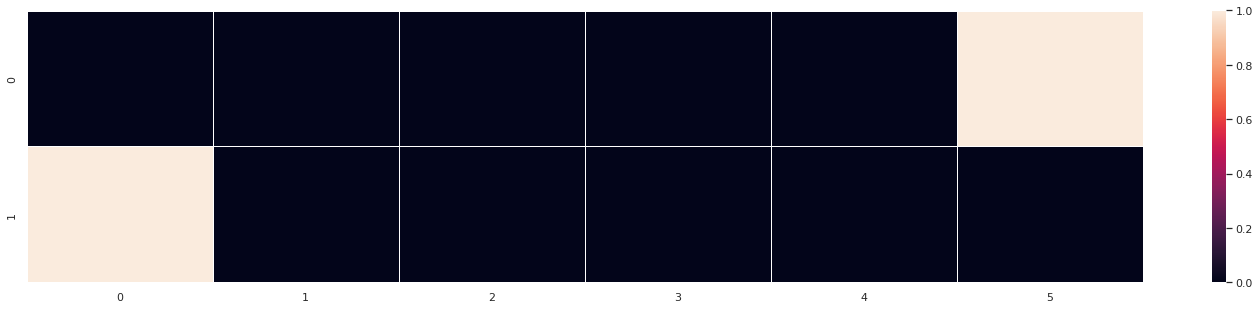

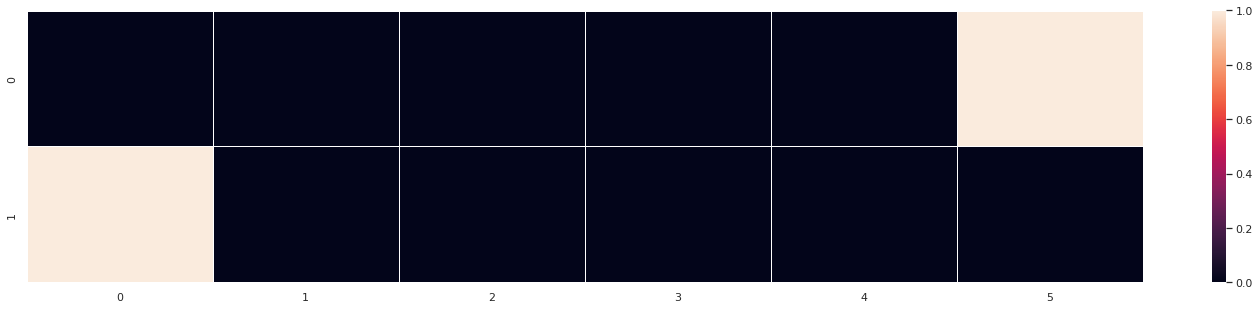

In [6]:
draw_heatmap(W_1.T) # lambda = 1  <====== global 
draw_heatmap(W_3.T) # lambda = 3 
draw_heatmap(W_5.T) # lambda = 5
draw_heatmap(W_10.T)   # lambda = 10  <===== local

### 為每個cluster找出最佳的feature pairs

In [7]:
cluster_fp_1 = get_clusters_fps(W_1.T, fp_record)
cluster_fp_3 = get_clusters_fps(W_3.T, fp_record)
cluster_fp_5 = get_clusters_fps(W_5.T, fp_record)
cluster_fp_10 = get_clusters_fps(W_10.T, fp_record)

In [8]:
df_list = [create_df(data[outliers_index], data[inliers_index], C[i]) for i in range(len(C))]

### Lambda = 1  Incrimination

In [9]:
IR_W_1, _ = get_incrimination(C, X, X.shape[1] , W_1.T, 3)

------------------
[0.8095363683076429, 0.876877413807096, 0.9316573462381269]
[0.8095363683076429, 0.956571799153398, 0.9632012886643058]
------------------
[0.42024491717490053, 0.5600349586908517, 0.9521471221881906]
[0.9783662300482189, 1.0, 1.0]


### Lambda = 10  Incrimination

In [11]:
IR_W_10, _ =get_incrimination(C, X, X.shape[1] , W_10.T, 3)
save_W(IR_W_10, '../weights/W/', 'iris')

------------------
[0.8095363683076429, 0.876877413807096, 0.9316573462381269]
[0.8095363683076429, 0.956571799153398, 0.9632012886643058]
------------------
[0.9783662300482189, 1.0, 1.0]
[0.9783662300482189, 1.0, 1.0]


### Lambda = 1 

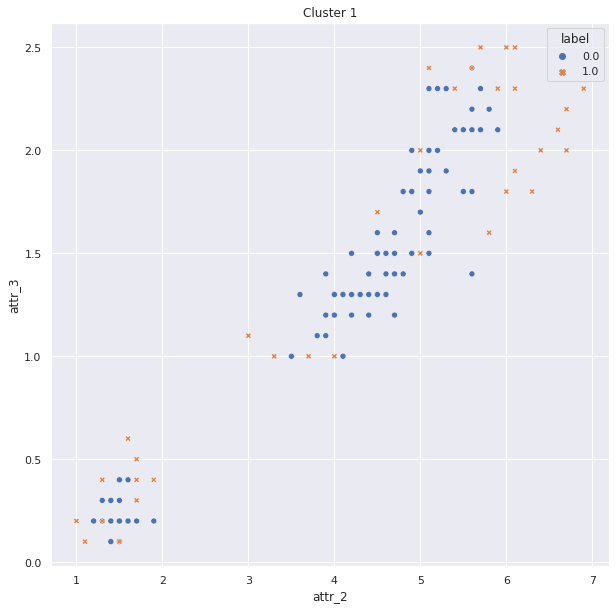

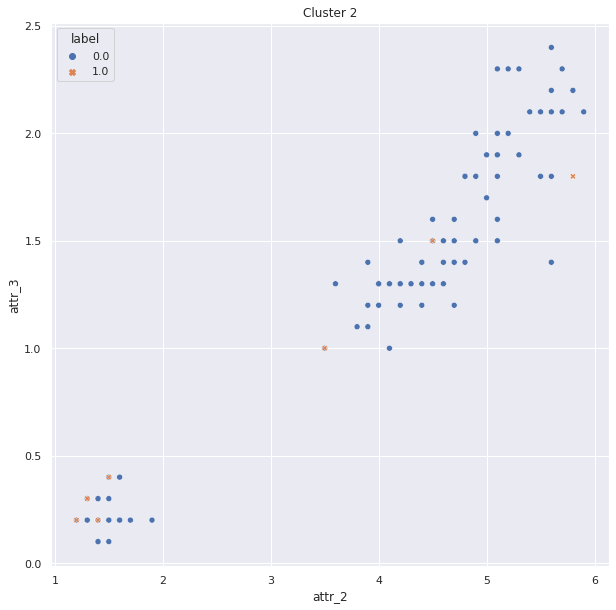

In [12]:
draw_scatter(df_list, cluster_fp_1)

### Lambda = 3 

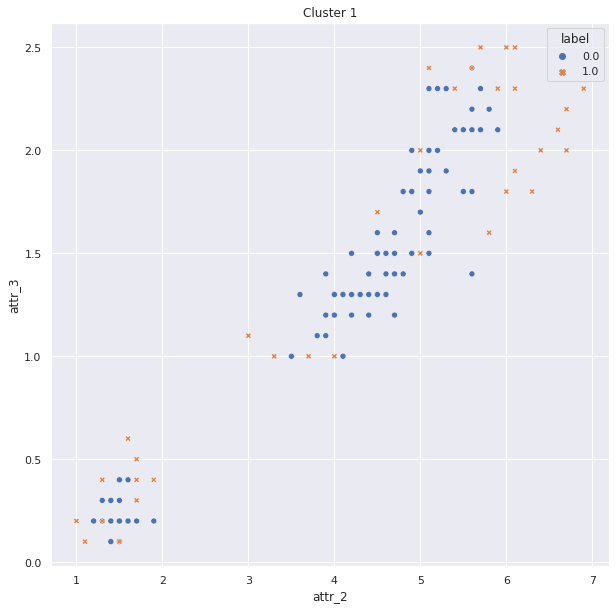

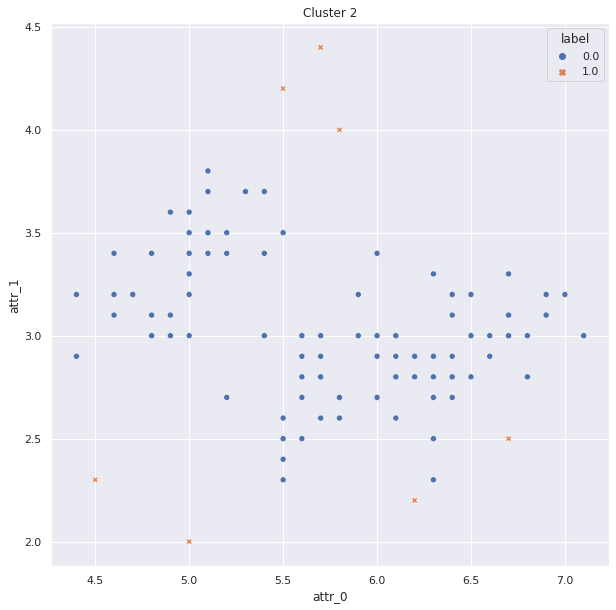

In [13]:
draw_scatter(df_list, cluster_fp_3)

### Lambda = 5

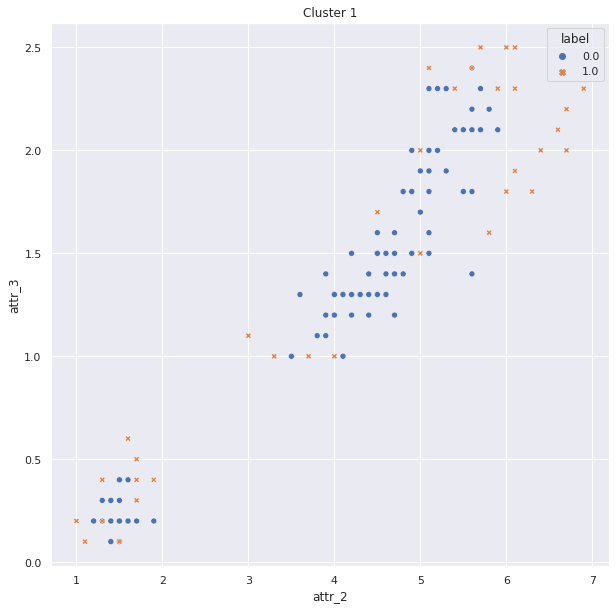

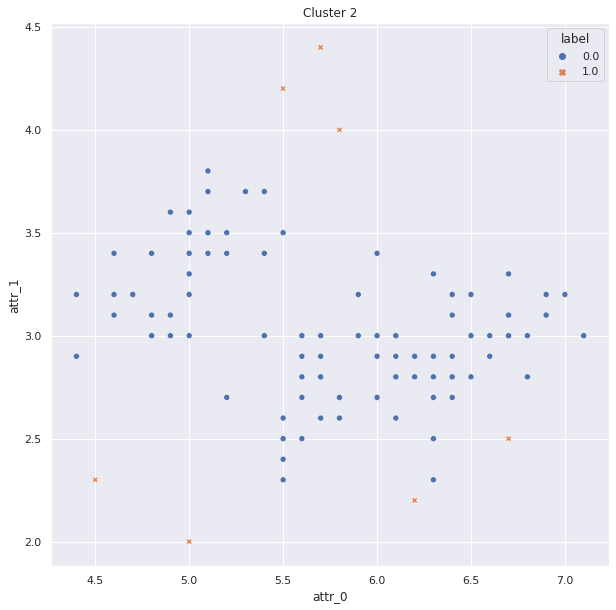

In [14]:
draw_scatter(df_list, cluster_fp_5)

### Lambda = 10

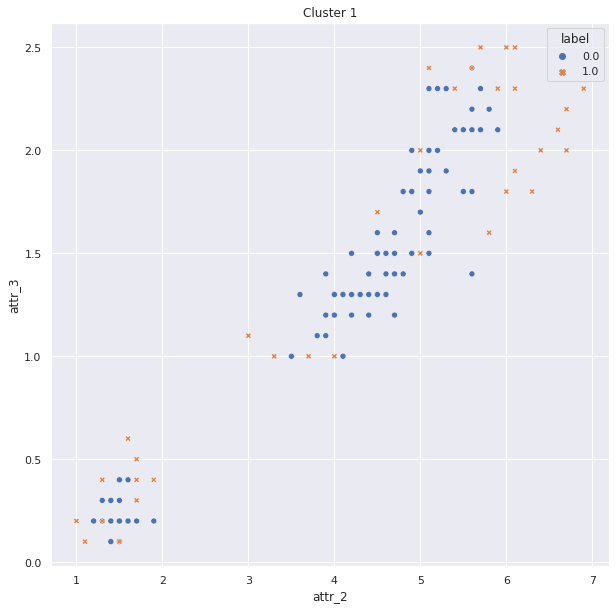

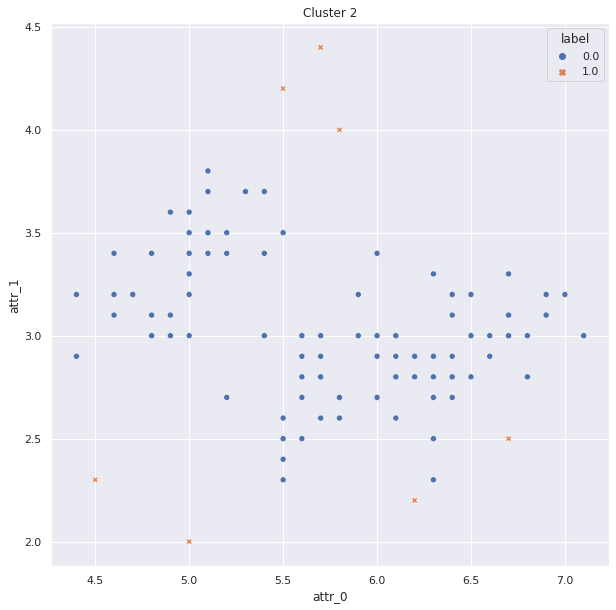

In [15]:
draw_scatter(df_list, cluster_fp_5)

### draw incrimination bar chart (using lambda = 1 & lambda = 10)

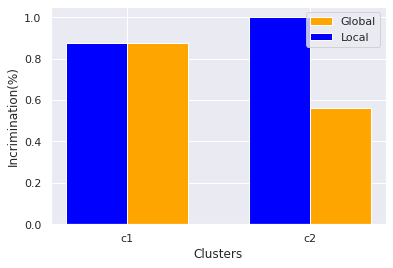

In [16]:
draw_barchart(IR_W_1, IR_W_10)